In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

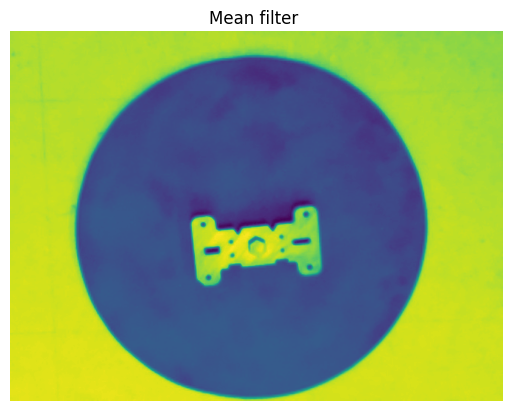

In [10]:
# Load image
img = cv2.imread('Michting.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# kernelMean =  np.ones((31,31),np.float32)/ 961# 

# # apply it to the image now 
# imgMean = cv2.filter2D(gray,-1,kernelMean)# 


plt.imshow(gray)
plt.title('Mean filter ')
plt.axis('off')  # Turn off axis
plt.show()


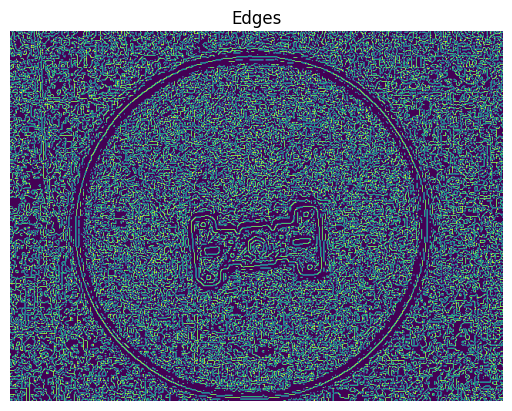

In [11]:
edges_inner_circle = cv2.Canny(img, threshold1=0, threshold2=0)

plt.imshow(edges_inner_circle)
plt.title('Edges')
plt.axis('off')
plt.show()

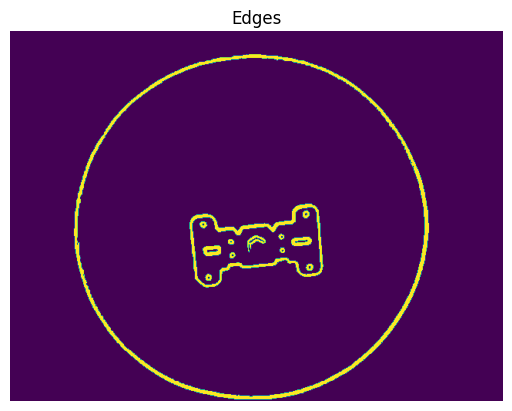

In [12]:

sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

threshold = 110
edges = np.uint8(gradient_magnitude > threshold) * 255


# Convert edges to binary image
ret, binary_edges = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY)
# Show the edges
plt.imshow(binary_edges)
plt.title('Edges')
plt.axis('off')
plt.show()

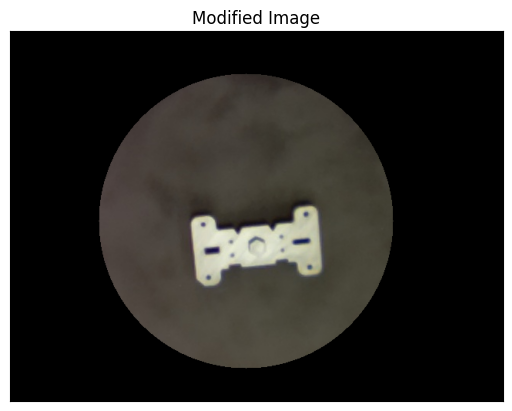

In [13]:
# # Define parameter values
# param1_values = [200]  # Upper threshold for the edge detector
# param2_values = [45]   # Threshold for circle detection
# dp_values = [1]        # Inverse ratio of the accumulator resolution to the image resolution

# best_params = None
# best_circles = None
# best_circle_count = 0

# # Calculate minDist value
# minDist_value = img.shape[0] // 4

# msg1 = "Yes, object is withinnnn."
# msg2 = "like not evennnn super overhanging"
# msg3 = "good"
# msg4 = "warning"
# # Iterate over parameter combinations
# for dp in dp_values:
#     for param1 in param1_values:
#         for param2 in param2_values:
#             circles = cv2.HoughCircles(binary_edges,
#                                        cv2.HOUGH_GRADIENT,
#                                        dp=dp,
#                                        minDist=minDist_value,
#                                        param1=param1,
#                                        param2=param2,
#                                        minRadius=0,
#                                        maxRadius=0)
#             if circles is not None:
#                 circle_count = len(circles[0])
#                 if circle_count > best_circle_count:
#                     best_circle_count = circle_count
#                     best_params = (dp, minDist_value, param1, param2)
#                     best_circles = circles
                    
#                     print("in")
                    
    
#                     best_circles = np.uint16(np.around(best_circles))
#                     for circle in best_circles[0, :1]:
#                         center = (circle[0], circle[1])
#                         radius = circle[2]
#                             # Draw circle
#                         cv2.circle(img, center, radius, (0, 255, 0), 5)                
                            
#                             # Create a mask for the region inside of the ROI
#                         mask = np.zeros_like(img)
#                         roi_image = cv2.bitwise_and(img, mask)

#                         cv2.circle(mask, center, (radius-40), (255, 255, 255), thickness=1)  # Draw circle in the mask

                            
#                             # Set pixels outside of the ROI to a dark color (e.g., black)
#                         img[mask[:,:,0] != 0] = [0, 0, 0] 
                        
                
                    
#             else:
#                 print("like not evennnn super overhanging")
 
              




# # Display the modified image
# plt.imshow(img)
# plt.title('Modified Image')
# plt.xticks([]), plt.yticks([])
# plt.show()

# #break out to have the steps by step to have everything working .

# Define parameter values
param1_values = [200]  # Upper threshold for the edge detector
param2_values = [45]   # Threshold for circle detection
dp_values = [1]        # Inverse ratio of the accumulator resolution to the image resolution


best_circles = None
best_circle_count = 0

# Calculate minDist value
minDist_value = img.shape[0] // 4

# Iterate over parameter combinations
for dp in dp_values:
    for param1 in param1_values:
        for param2 in param2_values:
            circles = cv2.HoughCircles(binary_edges,
                                       cv2.HOUGH_GRADIENT,
                                       dp=dp,
                                       minDist=minDist_value,
                                       param1=param1,
                                       param2=param2,
                                       minRadius=0,
                                       maxRadius=0)
            if circles is not None:
                circle_count = len(circles[0])
                if circle_count > best_circle_count:
                    best_circle_count = circle_count
                   
                    best_circles = circles

                    best_circles = np.uint16(np.around(best_circles))
                    for circle in best_circles[0, :1]:
                        center = (circle[0], circle[1])
                        radius = circle[2]
                        
                        # Draw circle
                        cv2.circle(img, center, radius, (0, 255, 0), 5)                
                        
                        # Create a mask for the region inside of the ROI
                        mask = np.zeros_like(img)
                        cv2.circle(mask, center, radius - 40, (255, 255, 255), thickness=-1)  # Fill the circle in the mask
                        
                        # Set pixels outside of the ROI to a dark color (e.g., black)
                        img[mask[:, :, 0] == 0] = [0, 0, 0]
            else:
                print("like not evennnn super overhanging")

# Convert the image to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the modified image
plt.imshow(img_rgb)
plt.title('Modified Image')
plt.xticks([]), plt.yticks([])
plt.show()

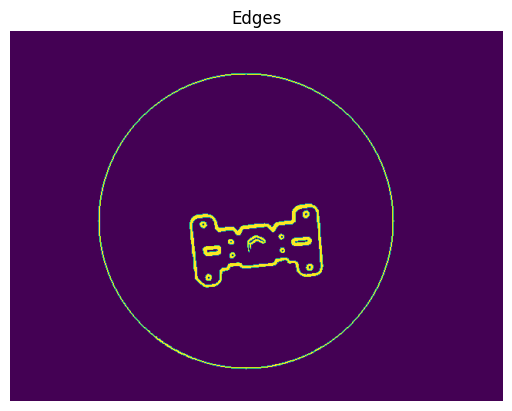

In [14]:
                        
gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                        
sobel_x2 = cv2.Sobel(gray2, cv2.CV_64F, 1, 0, ksize=3)
sobel_y2 = cv2.Sobel(gray2, cv2.CV_64F, 0, 1, ksize=3)

gradient_magnitude2 = np.sqrt(sobel_x2**2 + sobel_y2**2)

threshold2 = 110
edges2 = np.uint8(gradient_magnitude2 > threshold2) * 255


                        # Convert edges to binary image
ret2, binary_edges2 = cv2.threshold(edges2, 0, 255, cv2.THRESH_BINARY)

                        # do an edge detection on this before :
                                # Perform another Hough Circle Transform to find the second circle make sure the second circle is not the first one set a condition to omitt this hough circle operation to find the frist second againa and if found skip it and opt for another one 

plt.imshow(binary_edges2)
plt.title('Edges')
plt.axis('off')
plt.show()





Good


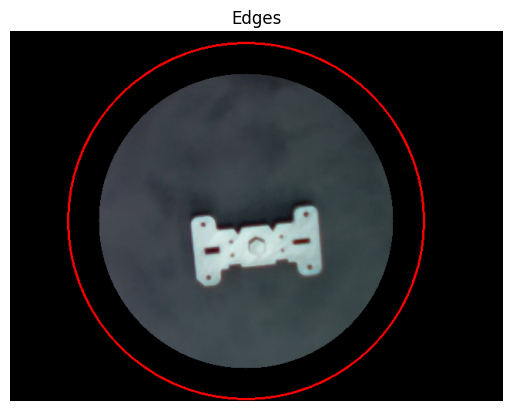

In [15]:
best_params2 = None
best_circles2 = None
best_circle_count2 = 0

for dp in dp_values:
    for param1 in param1_values:
        for param2 in param2_values:   
            circlesW = cv2.HoughCircles(binary_edges2,
                                        cv2.HOUGH_GRADIENT,
                                        dp=dp,
                                        minDist=minDist_value,
                                        param1=50,
                                        param2=30,
                                        minRadius= 0,
                                        maxRadius=radius-40)

            if circlesW is not None:
                circle_count2 = len(circlesW[0])
                if circle_count2 > best_circle_count2:
                    best_circle_count2 = circle_count2
                    best_params2 = (dp, minDist_value, param1, param2)
                    best_circles2 = circlesW      
                    print("Good")
                                            
                            
            else:
                print("Warning rolling out ")   
                
            best_circles2 = np.uint16(np.around(best_circles2))
            for circle2 in best_circles[0, :1]:
                center2 = (circle2[0], circle2[1])
                radius2 = circle2[2]
                cv2.circle(img, center2, radius2, (255, 0, 0), 2) 
    
plt.imshow(img)
plt.title('Edges')
plt.axis('off')
plt.show()  


now display the egdes detction in ROI and the overlapping test make sure to stop program when the ROI is not being detected no more .

problem is that its taking the egde of the circle in account . so set a new perimiter that would be the ROI cuz its taking the outside edges.

ok now do edge detection is the small perimter i have and , if circel not detectiong then print message overhang